Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

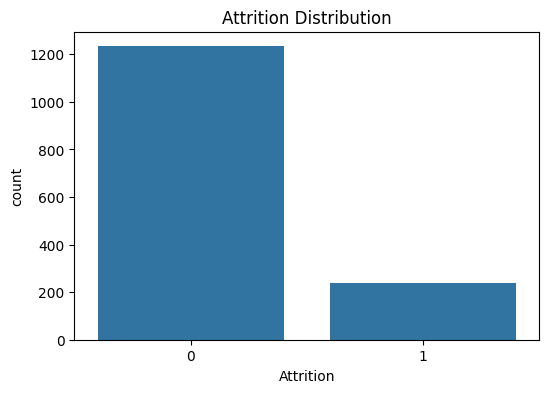

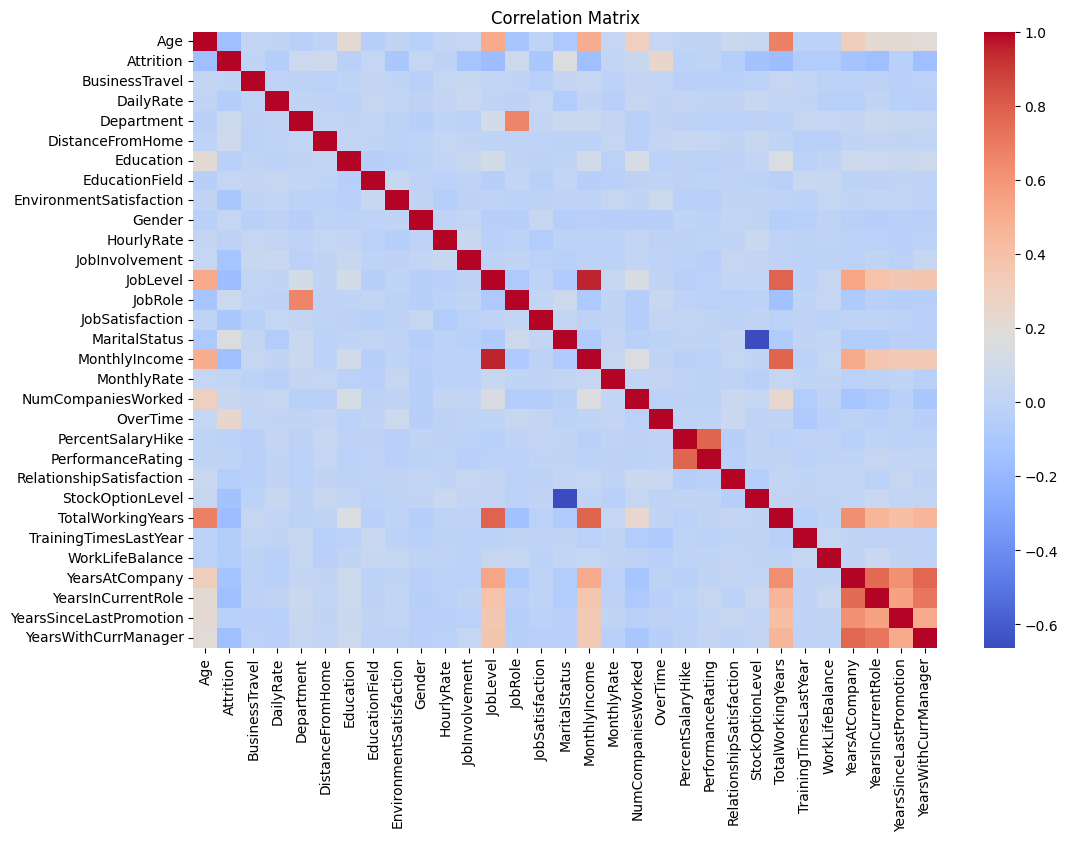

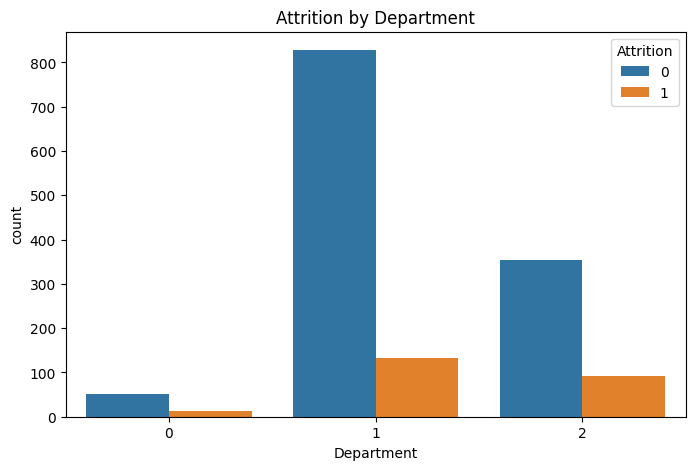

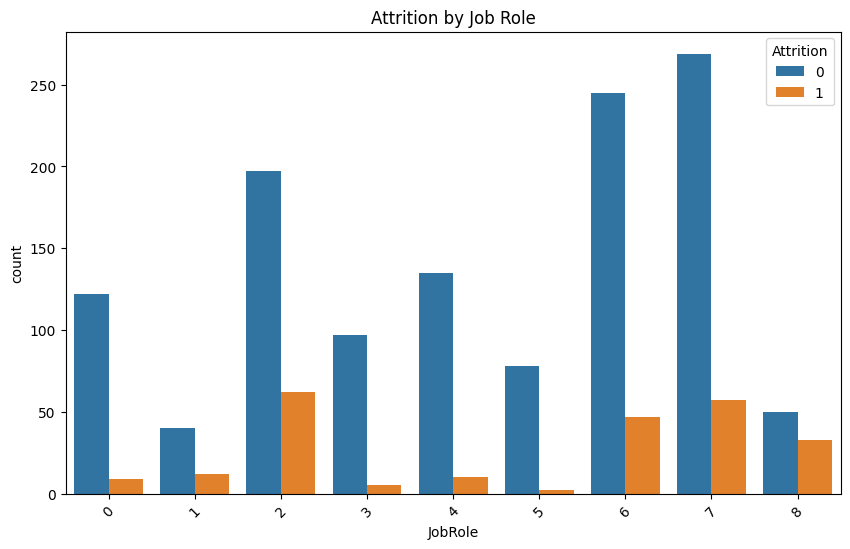

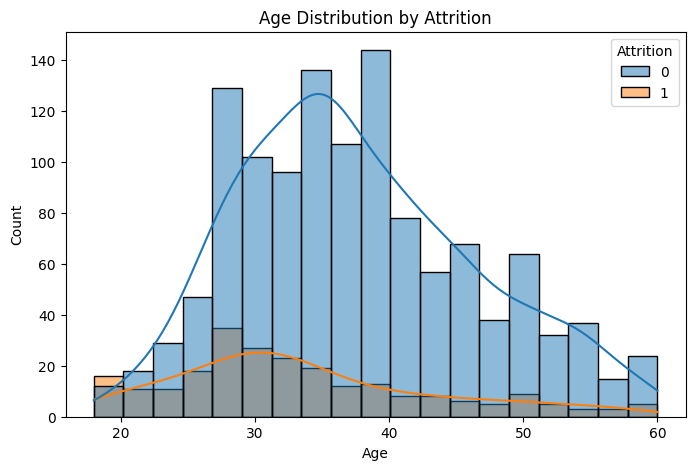

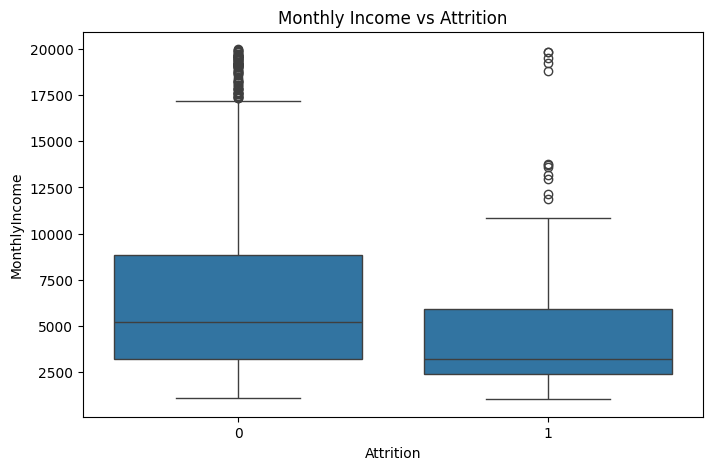

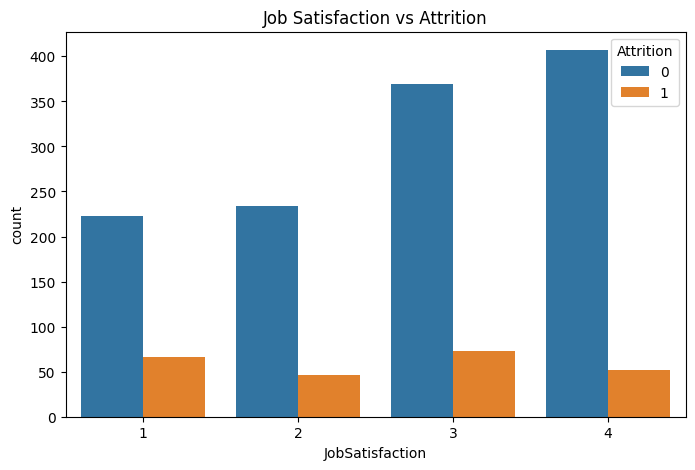

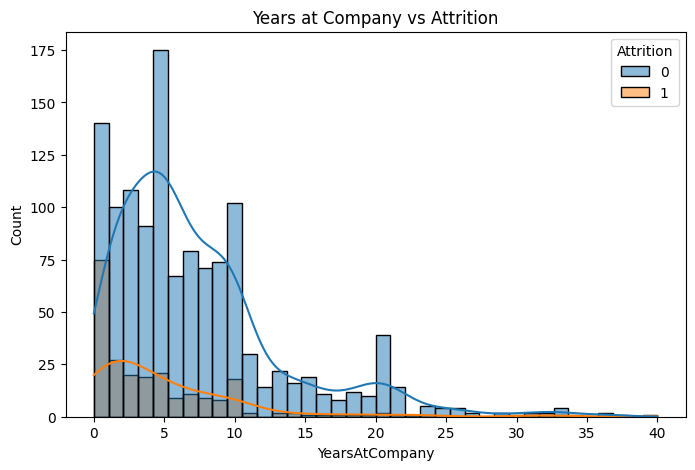

Feature Importance:
                Feature  Importance
15       MonthlyIncome    0.080500
0                  Age    0.063493
2            DailyRate    0.057405
18            OverTime    0.055715
23   TotalWorkingYears    0.053946
16         MonthlyRate    0.051290
9           HourlyRate    0.050164
4     DistanceFromHome    0.048567
26      YearsAtCompany    0.039359
17  NumCompaniesWorked    0.035632
Logistic Regression - Cross-Validation F1 Score: 0.2854

Logistic Regression Evaluation:
Accuracy: 0.8571428571428571
Precision: 0.2857142857142857
Recall: 0.05128205128205128
F1 Score: 0.08695652173913043
ROC-AUC: 0.6987430869783812
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.29      0.05      0.09        39

    accuracy                           0.86       294
   macro avg       0.58      0.52      0.50       294
weighted avg       0.79      0.86      0.81       294

Random Forest - Cross-Validation 

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier
import joblib

# Step 2: Load the Dataset
# Upload the dataset to Google Colab manually or use this code if it's in your Drive
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('your_uploaded_file.csv')

# Assuming the dataset is uploaded as 'employee_attrition.csv'
df = pd.read_csv('/content/employee_attrition.csv')  # Adjust path as needed

# Step 3: Data Preprocessing
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop unnecessary columns (e.g., EmployeeCount, EmployeeNumber, StandardHours, Over18 - all have single values)
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Exploratory Data Analysis (EDA)
# Distribution of Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Attrition by Department
plt.figure(figsize=(8, 5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.show()

# Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.show()

# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)
plt.title('Age Distribution by Attrition')
plt.show()

# Monthly Income vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

# Job Satisfaction vs Attrition
plt.figure(figsize=(8, 5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()

# Years at Company vs Attrition
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', kde=True)
plt.title('Years at Company vs Attrition')
plt.show()

# Step 5: Feature Engineering and Selection
# Use Random Forest to identify feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("Feature Importance:\n", feature_importance.head(10))

# Select top 10 features
top_features = feature_importance['Feature'].head(10).tolist()
X_selected = X[top_features]
X_selected_scaled = scaler.fit_transform(X_selected)

# Step 6: Model Selection and Training
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Cross-validation and model evaluation
best_model = None
best_score = 0
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    mean_cv_score = np.mean(cv_scores)
    print(f"{name} - Cross-Validation F1 Score: {mean_cv_score:.4f}")

    # Train and evaluate on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_prob is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_prob))
    print(classification_report(y_test, y_pred))

    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_model = model

# Step 7: Save the Best Model
joblib.dump(best_model, 'best_attrition_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(top_features, 'top_features.pkl')

print(f"Best Model: {best_model.__class__.__name__} with F1 Score: {best_score:.4f}")

# Step 8: Interpretation and Actionable Insights
# Feature importance from the best model (if applicable)
if hasattr(best_model, 'feature_importances_'):
    importance = pd.DataFrame({'Feature': top_features, 'Importance': best_model.feature_importances_})
    print("\nTop Features Driving Attrition:\n", importance.sort_values('Importance', ascending=False))
    print("\nActionable Insights:")
    print("- Focus on employees with low job satisfaction and poor work-life balance.")
    print("- Address income disparities, especially for employees with longer tenure.")
    print("- Provide career growth opportunities to reduce attrition due to years since last promotion.")